# 2026/02/23 BME1462: Morphological Image Processing II 

By Aaron Zeng, Zion Park, and Caresse Nian

## Topics of Focus: Hit-or-Miss Transform and Hole Filling (Morphological Algorithm)

## Library and Image Set Up

In [2]:
from skimage import io, morphology
from skimage.morphology import erosion
import numpy as np
import matplotlib.pyplot as plt

# 1. Hit-or-Miss Transform
## 1.1 What is a Hit-or-Miss Transform?
The hit-or-miss (HMT) transform is a *binary morphological operator* that detects **exact spatial configurations**. In other words, it finds locations where a specific foreground shape exists **AND** a specific background pattern exists around it.

This is different from dilation and erosion, which only look at foreground.
- Erosion: Is the foreground shape  present?
- Dilation: Could the foreground shape fit?
- HMT: Is the shape present **and** is the surrounding area empty?

## 1.2 Mathematical Definition
$$ A \circledast (B_1, B_2) = (A \ominus B_1)\cap (A^c \ominus B_2) $$

Where:
- $ A $ = binary image (foregorund = 1)
- $ B_1 $ = foreground structuring element (SE)
- $ B_2 $ = background SE

Interpretation:
- First erosion $A \ominus B_1$ checks **what must be present**
- Second erosion $A^c \ominus B_2$ checks **what must be absent**
- Intersection $\cap$ enforces both simultaneously

## 1.3 Defining Foreground and Background SE
Take a look at the following candidate patterns:

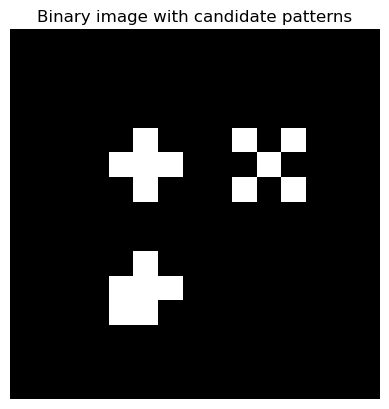

In [6]:
def show(img, title):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    
img = np.zeros((15, 15), dtype=bool)

# perfect cross
img[4:7, 4:7] = [[0,1,0],
                 [1,1,1],
                 [0,1,0]]

# cross with extra pixel (should FAIL)
img[9:12, 4:7] = [[0,1,0],
                  [1,1,1],
                  [1,1,0]]

# rotated pattern (should FAIL)
img[4:7, 9:12] = [[1,0,1],
                  [0,1,0],
                  [1,0,1]]

show(img, "Binary image with candidate patterns")

Consider that the plus (+) pattern is the target. How can we demand *exact structure*?
- Foreground SE must encode prescence (center plus pattern)
- Background SE must encode absence (corners)

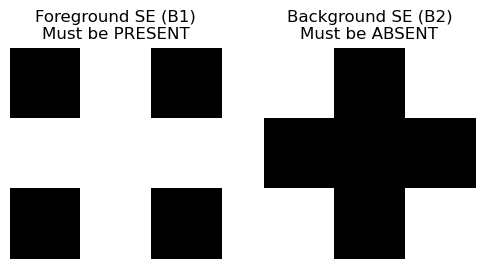

In [14]:
def show_side_by_side(img1, title1, img2, title2, cmap="gray"):
    plt.figure(figsize=(6, 3))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap=cmap)
    plt.title(title1)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap=cmap)
    plt.title(title2)
    plt.axis("off")
    
B1 = np.array([[0,1,0],
               [1,1,1],
               [0,1,0]], dtype=bool)

B2 = np.array([[1,0,1],
               [0,0,0],
               [1,0,1]], dtype=bool)

show_side_by_side(
    B1, "Foreground SE (B1)\nMust be PRESENT",
    B2, "Background SE (B2)\nMust be ABSENT"
)

## 1.4 Why Erosion Alone is Not Enough (i.e. why must absence be explicitly specified?)
Let's try eroding using only the foreground SE:

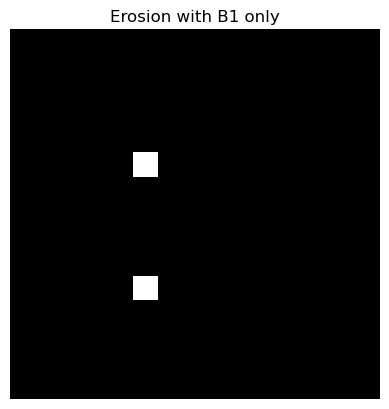

In [19]:
eroded_fg = erosion(img, B1)
show(eroded_fg, "Erosion with B1 only")

**Result:**
- Multiple locations survive erosion -> 'false' positives

**Interpretation:**

Erosion is able to answer "Is this foreground pattern present anywhere inside the neighborhood?", however is does *not* ask "Is anything extra present?".
- detects presence
- ignores absence

Now let's look at eroding the complement image using the background SE:

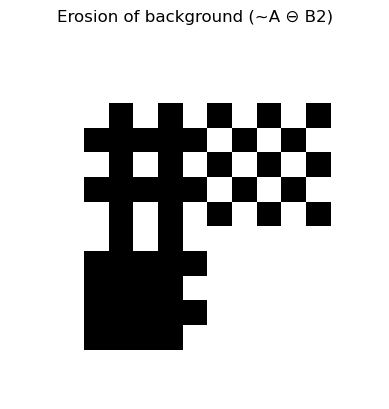

In [20]:
eroded_bg = erosion(~img, B2)
show(eroded_bg, "Erosion of background (~A ⊖ B2)")

This enforces which pixels must be zero. 

### The hit-or-miss transform happens here:
Intersect both conditions:

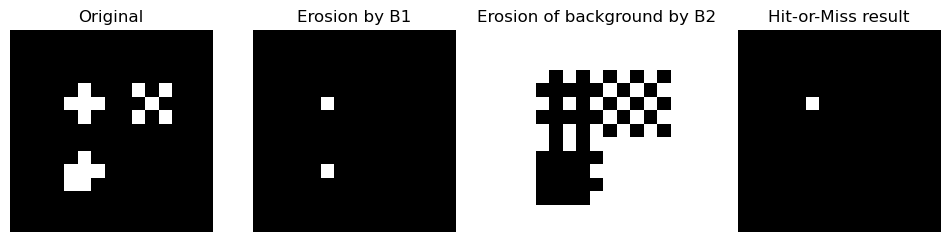

In [18]:
hit_or_miss_manual = eroded_fg & eroded_bg

plt.figure(figsize=(12,3))

plt.subplot(1,4,1)
show(img, "Original")

plt.subplot(1,4,2)
show(eroded_fg, "Erosion by B1")

plt.subplot(1,4,3)
show(eroded_bg, "Erosion of background by B2")

plt.subplot(1,4,4)
show(hit_or_miss_manual, "Hit-or-Miss result")


By intersecting foreground SE and background SE erosion, the background SE is able to address the flaw of foreground SE erosion (i.e. does not ask "Is anything extra present?") by enforcing which pixels must be absent.

This results in only one detection, which is the center of the desired plus (+) pattern.

## Why Do Hit-or-Miss Only Work on Binary Images?


Material covered based on Digital Image Processing, Gonzalez and Woods, Prentice Hall, 4th edition 

Images Acquired from the Following Sources: 

### Recap: Morphological Image Processing I 

Recall the principles of mathematical morphology 